# ASSIGNMENT 4

## Part 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
codes = pd.read_csv("codes.csv", delimiter=';')
test_set = pd.read_csv("test_set.csv", delimiter=';')
train_set = pd.read_csv("train_set.csv", delimiter=';')
transactions = pd.read_csv("transactions.csv", delimiter=';')
types = pd.read_csv("types.csv", delimiter=';')

## Explore the dataset

In [3]:
print(codes)

     code                                   code_description
0    5944  Магазины по продаже часов, ювелирных изделий и...
1    5621                           Готовые сумочные изделия
2    5697       Услуги по переделке, починке и пошиву одежды
3    7995                       Транзакции по азартным играм
4    5137             Мужская, женская и детская спец-одежда
..    ...                                                ...
179  5044  Офисное, фотографическое, фотокопировальное, и...
180  5983  Горючее топливо — уголь, нефть, разжиженный бе...
181  5994               Дилеры по продаже печатной продукции
182  5192              Книги, периодические издания и газеты
183  7922                 Театральные продюсерские агентства

[184 rows x 2 columns]


In [4]:
print(test_set)

      client_id
0      61240380
1      34114030
2      15926722
3      50598019
4      76475250
...         ...
2651   13491189
2652   54047312
2653   68859452
2654   95721840
2655    4022959

[2656 rows x 1 columns]


In [5]:
print(train_set)

      client_id  target
0      75063019       0
1      86227647       1
2       6506523       0
3      50615998       0
4      95213230       0
...         ...     ...
5995   71577803       0
5996    8128547       1
5997   26055781       0
5998   73504380       1
5999    1846496       0

[6000 rows x 2 columns]


In [6]:
print(transactions)

        client_id      datetime  code  type         sum
0        96372458  421 06:33:15  6011  2010  -561478.94
1        24567813  377 17:20:40  6011  7010    67377.47
2        21717441   55 13:38:47  6011  2010   -44918.32
3        14331004  263 12:57:08  6011  2010 -3368873.66
4        85302434  151 10:34:12  4814  1030    -3368.87
...           ...           ...   ...   ...         ...
130034   15836839  147 11:50:53  5411  1010   -26344.59
130035   28369355  305 11:59:34  4829  2330   -24705.07
130036   40949707  398 21:13:58  5411  1110   -40353.72
130037    7174462  409 13:58:14  5411  1010   -25536.06
130038   92197764  319 00:00:00  5533  1110   -12127.95

[130039 rows x 5 columns]


In [7]:
print(types)

     type                                   type_description
0    8001                 Установление расх. лимита по карте
1    2411  Перевод с карты на счет др.лица в одном тер. б...
2    4035                                    н/д(нет данных)
3    3001            Комиссия за обслуживание ссудного счета
4    2420  Перевод с карты на счет физ.лица в другом тер....
..    ...                                                ...
150  4110                 Плата за получение наличных в АТМ.
151  2320     Безналичный перевод денежных средств через POS
152  7040  Перевод на карту (с карты) через POS (в предел...
153  2433  Перевод с карты на счет физ.лица в другом банк...
154  2431  Перевод с карты на счет физ.лица в другом банк...

[155 rows x 2 columns]


In [8]:
transactions_sex = pd.merge(train_set, transactions, on='client_id')

In [9]:
transactions_sex

,client_id,target,datetime,code,type,sum
0,75063019,0,397 20:05:07,4814,1030,-4491.83
1,75063019,0,86 20:29:50,6010,7070,4491.83
2,75063019,0,375 16:00:33,4814,1030,-3144.28
3,75063019,0,136 17:10:60,5411,1010,-3930.35
4,75063019,0,378 13:01:51,6011,2010,-4491.83
...,...,...,...,...,...,...
91821,1846496,0,452 00:00:00,5999,1100,-2243.45
91822,1846496,0,196 13:59:07,5411,1010,-4783.80
91823,1846496,0,186 13:38:15,5732,1010,-112273.33
91824,1846496,0,440 16:02:57,6010,7030,168443.68


In [10]:
transactions_sex_codes = pd.merge(codes, transactions_sex, on='code')

In [11]:
transactions_sex_codes

,code,code_description,client_id,target,datetime,type,sum
0,5944,"Магазины по продаже часов, ювелирных изделий и...",6051980,1,150 21:37:03,1010,-193620.40
1,5944,"Магазины по продаже часов, ювелирных изделий и...",87519015,0,161 00:00:00,1210,-120116.74
2,5944,"Магазины по продаже часов, ювелирных изделий и...",17389182,1,70 00:00:00,1210,-675898.92
3,5944,"Магазины по продаже часов, ювелирных изделий и...",11089937,0,426 00:00:00,1110,-10960.07
4,5944,"Магазины по продаже часов, ювелирных изделий и...",4725454,0,381 05:55:49,1010,-4042.65
...,...,...,...,...,...,...,...
91821,7922,Театральные продюсерские агентства,54783576,0,228 00:00:00,1100,-112295.79
91822,7922,Театральные продюсерские агентства,22852194,1,242 00:00:00,1110,-20213.24
91823,7922,Театральные продюсерские агентства,71331226,1,108 00:00:00,1110,-123525.37
91824,7922,Театральные продюсерские агентства,37096892,1,199 20:01:58,1110,-251542.57


In [12]:
joined = pd.merge(types, transactions_sex_codes, on='type')

In [13]:
joined

,type,type_description,code,code_description,client_id,target,datetime,sum
0,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",87519015,0,161 00:00:00,-120116.74
1,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",17389182,1,70 00:00:00,-675898.92
2,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",93572416,1,97 00:00:00,-73855.82
3,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,19380379,0,180 00:00:00,-61810.97
4,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,15531589,0,288 00:00:00,-160627.45
...,...,...,...,...,...,...,...,...
91795,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",85148152,1,438 17:57:21,-30.32
91796,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",95852599,0,355 12:37:30,-2111.16
91797,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,279 15:52:26,-5510.58
91798,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,446 09:31:40,-172184.70


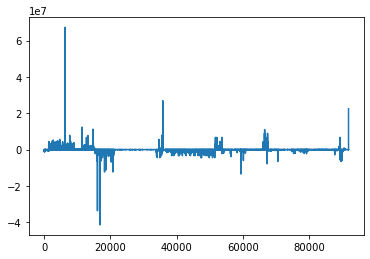

In [14]:
plt.plot(joined['sum'])
plt.show() 

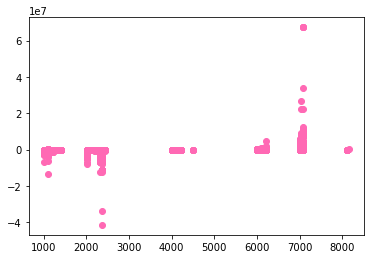

In [15]:
plt.scatter(joined['type'], joined['sum'], color = 'hotpink')
plt.show()

In [16]:
joined.isnull().sum()

type                0
type_description    0
code                0
code_description    0
client_id           0
target              0
datetime            0
sum                 0
dtype: int64

In [17]:
#droping the rows with reapated values
joined.drop_duplicates(keep=False, inplace=False)

,type,type_description,code,code_description,client_id,target,datetime,sum
0,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",87519015,0,161 00:00:00,-120116.74
1,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",17389182,1,70 00:00:00,-675898.92
2,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",93572416,1,97 00:00:00,-73855.82
3,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,19380379,0,180 00:00:00,-61810.97
4,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,15531589,0,288 00:00:00,-160627.45
...,...,...,...,...,...,...,...,...
91795,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",85148152,1,438 17:57:21,-30.32
91796,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",95852599,0,355 12:37:30,-2111.16
91797,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,279 15:52:26,-5510.58
91798,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,446 09:31:40,-172184.70


In [18]:
joined.dtypes

type                  int64
type_description     object
code                  int64
code_description     object
client_id             int64
target                int64
datetime             object
sum                 float64
dtype: object

In [19]:
joined.shape

(91800, 8)

In [20]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91800 entries, 0 to 91799
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              91800 non-null  int64  
 1   type_description  91800 non-null  object 
 2   code              91800 non-null  int64  
 3   code_description  91800 non-null  object 
 4   client_id         91800 non-null  int64  
 5   target            91800 non-null  int64  
 6   datetime          91800 non-null  object 
 7   sum               91800 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 6.3+ MB


In [21]:
joined.describe()

,type,code,client_id,target,sum
count,91800.000000,91800.000000,9.180000e+04,91800.000000,9.180000e+04
mean,2549.401972,5596.323693,5.169165e+07,0.491187,-1.662754e+04
std,2295.871717,602.189459,2.839977e+07,0.499925,6.233024e+05
min,1010.000000,742.000000,2.289900e+04,0.000000,-4.150030e+07
25%,1030.000000,5251.000000,2.732015e+07,0.000000,-2.156079e+04
50%,1110.000000,5661.000000,5.388370e+07,0.000000,-5.232980e+03
75%,2370.000000,6010.000000,7.552189e+07,1.000000,-1.122960e+03
max,8145.000000,9402.000000,9.999124e+07,1.000000,6.737747e+07


In [22]:
#the total sum of column 'sum'
print("\nThe total sum:", joined['sum'].sum())

#minimum
print("\nThe minimum:", joined['sum'].min())

#maximum
print("\nThe maximum:", joined['sum'].max())

#average sum
print("\nThe average sum:", round(joined['sum'].sum()/len(joined['sum']), 2))


The total sum: -1526408114.74

The minimum: -41500301.14

The maximum: 67377473.16

The average sum: -16627.54


In [23]:
print("code_description has {} unique values".format(len(joined['code_description'].unique())))
print("Top 5 values are: {}".format(', '.join(joined['code_description'].value_counts().index[:5])))
print("type_description has {} unique values".format(len(joined['type_description'].unique())))
print("Top 5 values are: {}".format(', '.join(joined['type_description'].value_counts().index[:5])))

code_description has 173 unique values
Top 5 values are: Финансовые институты — снятие наличности автоматически, Финансовые институты — снятие наличности вручную, Звонки с использованием телефонов, считывающих магнитную ленту, Бакалейные магазины, супермаркеты, Денежные переводы
type_description has 53 unique values
Top 5 values are: Покупка. POS , Выдача наличных в АТМ, Оплата услуги. Банкоматы, Перевод на карту (с карты) через Мобильный банк (без взимания комиссии с отправителя), Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (без комиссии)


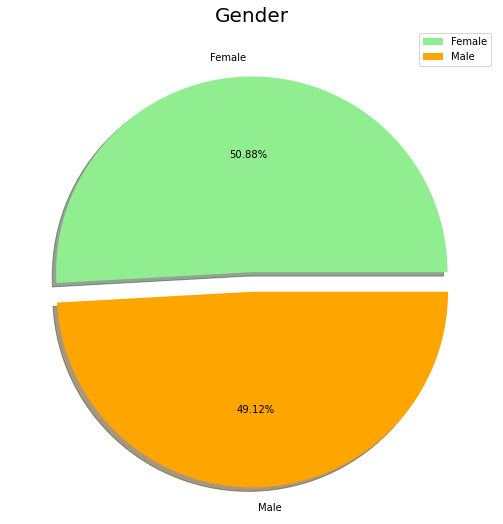

In [24]:
labels = ['Female', 'Male']
size = joined['target'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

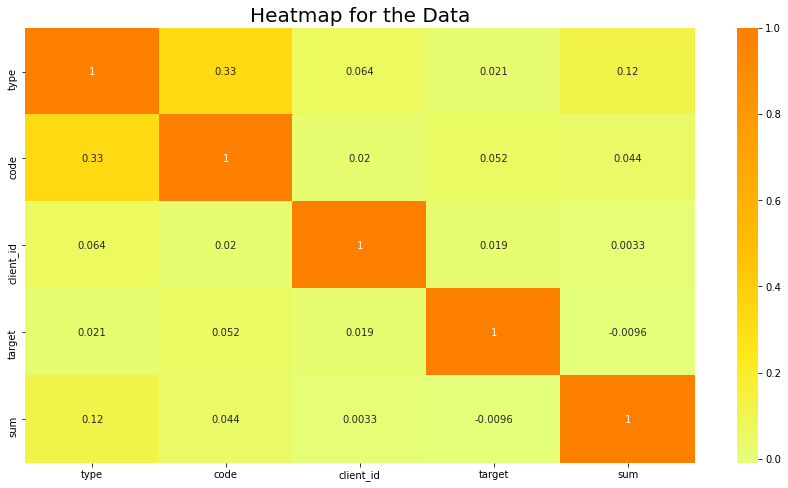

In [25]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(joined.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

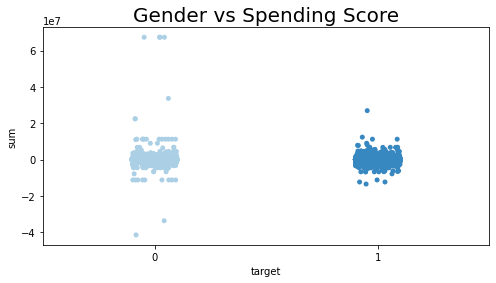

In [26]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.stripplot(joined['target'], joined['sum'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

## Feature engineering

In [27]:
joined

,type,type_description,code,code_description,client_id,target,datetime,sum
0,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",87519015,0,161 00:00:00,-120116.74
1,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",17389182,1,70 00:00:00,-675898.92
2,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",93572416,1,97 00:00:00,-73855.82
3,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,19380379,0,180 00:00:00,-61810.97
4,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,15531589,0,288 00:00:00,-160627.45
...,...,...,...,...,...,...,...,...
91795,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",85148152,1,438 17:57:21,-30.32
91796,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",95852599,0,355 12:37:30,-2111.16
91797,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,279 15:52:26,-5510.58
91798,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,446 09:31:40,-172184.70


In [28]:
listDateTime =  joined['datetime'].values.tolist()
g = len(listDateTime)
listDT=[]
for i in range(g):
    string = listDateTime[i]
    listRes = list(string.split(" "))
    listDT.append(listRes)
listTime = []   
for i in range(g):
    listTime.append(listDT[i][1])

listDay=[]
for i in range(g):
    listDay.append(listDT[i][0])


listT=[]
for i in range(g):
    string = listTime[i]
    listRes = list(string.split(':'))
    listT.append(listRes)
listHourMin = []

for i in range(g):
    listT[i][2]='00'

times=[]
for i in range(g):
    times.append((':').join(listT[i]))

joined['time'] = times
joined['day'] = listDay
joined["time"]= pd.to_timedelta(joined["time"])



In [29]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91800 entries, 0 to 91799
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   type              91800 non-null  int64          
 1   type_description  91800 non-null  object         
 2   code              91800 non-null  int64          
 3   code_description  91800 non-null  object         
 4   client_id         91800 non-null  int64          
 5   target            91800 non-null  int64          
 6   datetime          91800 non-null  object         
 7   sum               91800 non-null  float64        
 8   time              91800 non-null  timedelta64[ns]
 9   day               91800 non-null  object         
dtypes: float64(1), int64(4), object(4), timedelta64[ns](1)
memory usage: 10.2+ MB


In [30]:
u = joined.assign(Time=pd.to_timedelta(joined['time']))
bins = [-1,6,11,17,24]
labels = ['Night','Morning','Afternoon','Evening']
u = u.assign(Time_Group=pd.cut(joined['time'],[pd.Timedelta(hours=i) for i in bins],
                               labels=labels))
u


,type,type_description,code,code_description,client_id,target,datetime,sum,time,day,Time,Time_Group
0,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",87519015,0,161 00:00:00,-120116.74,0 days 00:00:00,161,0 days 00:00:00,Night
1,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",17389182,1,70 00:00:00,-675898.92,0 days 00:00:00,70,0 days 00:00:00,Night
2,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",93572416,1,97 00:00:00,-73855.82,0 days 00:00:00,97,0 days 00:00:00,Night
3,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,19380379,0,180 00:00:00,-61810.97,0 days 00:00:00,180,0 days 00:00:00,Night
4,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,15531589,0,288 00:00:00,-160627.45,0 days 00:00:00,288,0 days 00:00:00,Night
...,...,...,...,...,...,...,...,...,...,...,...,...
91795,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",85148152,1,438 17:57:21,-30.32,0 days 17:57:00,438,0 days 17:57:00,Evening
91796,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",95852599,0,355 12:37:30,-2111.16,0 days 12:37:00,355,0 days 12:37:00,Afternoon
91797,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,279 15:52:26,-5510.58,0 days 15:52:00,279,0 days 15:52:00,Afternoon
91798,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,446 09:31:40,-172184.70,0 days 09:31:00,446,0 days 09:31:00,Morning


In [31]:
u.isnull().any().any()

False

In [32]:
y=u['Time_Group'].tolist()
joined['Time_Group'] = y
joined

,type,type_description,code,code_description,client_id,target,datetime,sum,time,day,Time_Group
0,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",87519015,0,161 00:00:00,-120116.74,0 days 00:00:00,161,Night
1,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",17389182,1,70 00:00:00,-675898.92,0 days 00:00:00,70,Night
2,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",93572416,1,97 00:00:00,-73855.82,0 days 00:00:00,97,Night
3,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,19380379,0,180 00:00:00,-61810.97,0 days 00:00:00,180,Night
4,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,15531589,0,288 00:00:00,-160627.45,0 days 00:00:00,288,Night
...,...,...,...,...,...,...,...,...,...,...,...
91795,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",85148152,1,438 17:57:21,-30.32,0 days 17:57:00,438,Evening
91796,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",95852599,0,355 12:37:30,-2111.16,0 days 12:37:00,355,Afternoon
91797,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,279 15:52:26,-5510.58,0 days 15:52:00,279,Afternoon
91798,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,446 09:31:40,-172184.70,0 days 09:31:00,446,Morning


In [33]:
a=joined['day'].astype(str).astype(int)
joined['int_day']=a
joined

,type,type_description,code,code_description,client_id,target,datetime,sum,time,day,Time_Group,int_day
0,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",87519015,0,161 00:00:00,-120116.74,0 days 00:00:00,161,Night,161
1,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",17389182,1,70 00:00:00,-675898.92,0 days 00:00:00,70,Night,70
2,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",93572416,1,97 00:00:00,-73855.82,0 days 00:00:00,97,Night,97
3,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,19380379,0,180 00:00:00,-61810.97,0 days 00:00:00,180,Night,180
4,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,15531589,0,288 00:00:00,-160627.45,0 days 00:00:00,288,Night,288
...,...,...,...,...,...,...,...,...,...,...,...,...
91795,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",85148152,1,438 17:57:21,-30.32,0 days 17:57:00,438,Evening,438
91796,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",95852599,0,355 12:37:30,-2111.16,0 days 12:37:00,355,Afternoon,355
91797,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,279 15:52:26,-5510.58,0 days 15:52:00,279,Afternoon,279
91798,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,446 09:31:40,-172184.70,0 days 09:31:00,446,Morning,446


In [34]:
for i in range(g):
    if joined['int_day'][i]>153:
        while joined['int_day'][i]>153:
            new_day=joined['int_day'][i]-153
            joined['int_day'][i]=new_day

In [35]:
for i in range(g):
    if joined['int_day'][i] in range(0,32):
        joined['int_day'][i]=0  #aug
    elif joined['int_day'][i] in range(32,62):
        joined['int_day'][i]=1  #sep
    elif joined['int_day'][i] in range(62,93):
        joined['int_day'][i]=2 #oct
    elif joined['int_day'][i] in range(93,123):
        joined['int_day'][i]=3 #nov
    elif joined['int_day'][i] in range(123,154):
        joined['int_day'][i]=4 #december  

In [36]:
for i in range(g):
    if joined['Time_Group'][i]=='Night':
        joined['Time_Group'][i]=0
    elif joined['Time_Group'][i]=='Morning':
        joined['Time_Group'][i]=1
    elif joined['Time_Group'][i]=='Afternoon':
        joined['Time_Group'][i]=2
    elif joined['Time_Group'][i]=='Evening':
        joined['Time_Group'][i]=3
    

In [37]:
a=joined['Time_Group'].astype(str).astype(int)
joined['Time_Group']=a
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91800 entries, 0 to 91799
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   type              91800 non-null  int64          
 1   type_description  91800 non-null  object         
 2   code              91800 non-null  int64          
 3   code_description  91800 non-null  object         
 4   client_id         91800 non-null  int64          
 5   target            91800 non-null  int64          
 6   datetime          91800 non-null  object         
 7   sum               91800 non-null  float64        
 8   time              91800 non-null  timedelta64[ns]
 9   day               91800 non-null  object         
 10  Time_Group        91800 non-null  int32          
 11  int_day           91800 non-null  int32          
dtypes: float64(1), int32(2), int64(4), object(4), timedelta64[ns](1)
memory usage: 10.9+ MB


for i in range(g):
    if joined['int_day'][i] in range(0,32):
        joined['int_day'][i]='aug'
    elif joined['int_day'][i] in range(32,62):
        joined['int_day'][i]='sep'
    elif joined['int_day'][i] in range(62,93):
        joined['int_day'][i]='oct'
    elif joined['int_day'][i] in range(93,123):
        joined['int_day'][i]='nov'
    elif joined['int_day'][i] in range(123,154):
        joined['int_day'][i]='dec'  

In [38]:
joined = joined.drop(['day','datetime','time'], axis=1)
joined = joined.rename(columns={'int_day': 'month'})
joined

,type,type_description,code,code_description,client_id,target,sum,Time_Group,month
0,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",87519015,0,-120116.74,0,0
1,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",17389182,1,-675898.92,0,2
2,1210,Покупка. POS Зарубеж.,5944,"Магазины по продаже часов, ювелирных изделий и...",93572416,1,-73855.82,0,3
3,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,19380379,0,-61810.97,0,0
4,1210,Покупка. POS Зарубеж.,5621,Готовые сумочные изделия,15531589,0,-160627.45,0,4
...,...,...,...,...,...,...,...,...,...
91795,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",85148152,1,-30.32,3,4
91796,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",95852599,0,-2111.16,2,1
91797,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,-5510.58,2,4
91798,2320,Безналичный перевод денежных средств через POS,4900,"Коммунальные услуги — электричество, газ, сани...",94500594,0,-172184.70,1,4


In [39]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91800 entries, 0 to 91799
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   type              91800 non-null  int64  
 1   type_description  91800 non-null  object 
 2   code              91800 non-null  int64  
 3   code_description  91800 non-null  object 
 4   client_id         91800 non-null  int64  
 5   target            91800 non-null  int64  
 6   sum               91800 non-null  float64
 7   Time_Group        91800 non-null  int32  
 8   month             91800 non-null  int32  
dtypes: float64(1), int32(2), int64(4), object(2)
memory usage: 8.8+ MB


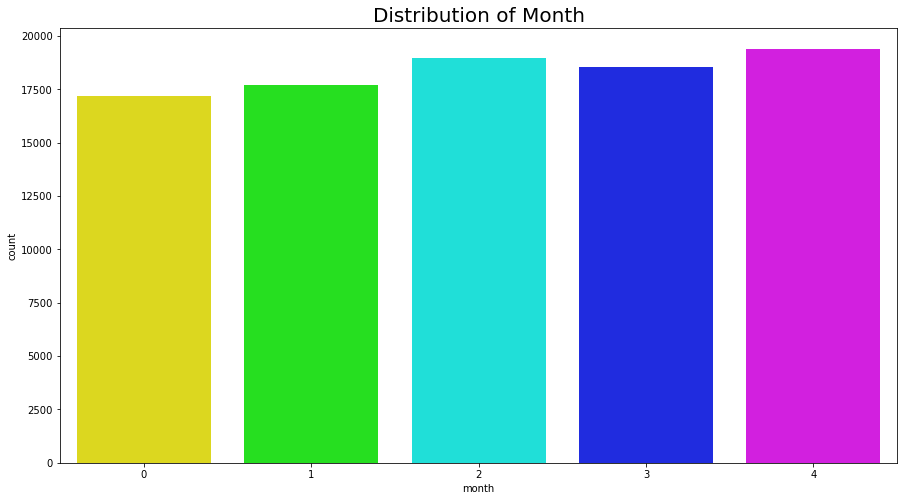

In [40]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(joined['month'], palette = 'hsv')
plt.title('Distribution of Month', fontsize = 20)
plt.show()

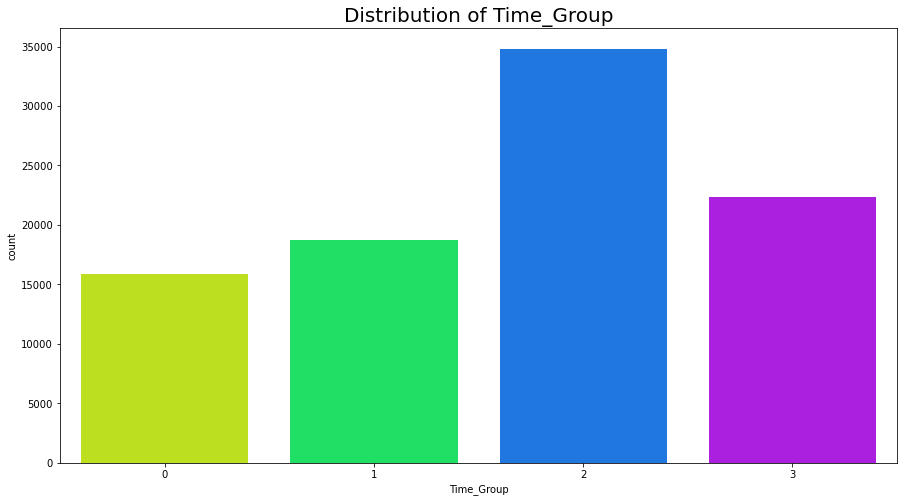

In [41]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(joined['Time_Group'], palette = 'hsv')
plt.title('Distribution of Time_Group', fontsize = 20)
plt.show()

### Unsupervised learning. Do the Cluster analysis. Segment the customers. K-means,Hierarchical Clustering. With different metrics, linkages. Visualize the clusters etc. Look for the optimal number of the clusters

In [42]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [43]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [44]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)
kmeans.inertia_ = joined['sum'].min()

# The lowest sum value
print("The lowest sum value:", kmeans.inertia_, "\n")

# Final locations of the centroid
print("Final locations of the centroid:\n", kmeans.cluster_centers_, "\n")

# The number of iterations required to converge
print("The number of iterations required to converge:", kmeans.n_iter_)

The lowest sum value: -41500301.14 

Final locations of the centroid:
 [[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]] 

The number of iterations required to converge: 6


In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the sum values for each k
sum = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sum.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sum)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("sum")
plt.show()

In [ ]:
#visualization
sns.relplot(
    x="code", y="type", hue="sum", data=joined, height=6,
);